## Audio Classification Data Preprocessing ##

In [1]:
#reading a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/191431-9-0-73.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data) #audio data by default converts the audio data into mono channel with 1 signal

[ 0.00389228  0.00845505  0.01697432 ... -0.00208947 -0.00125767
 -0.0056572 ]


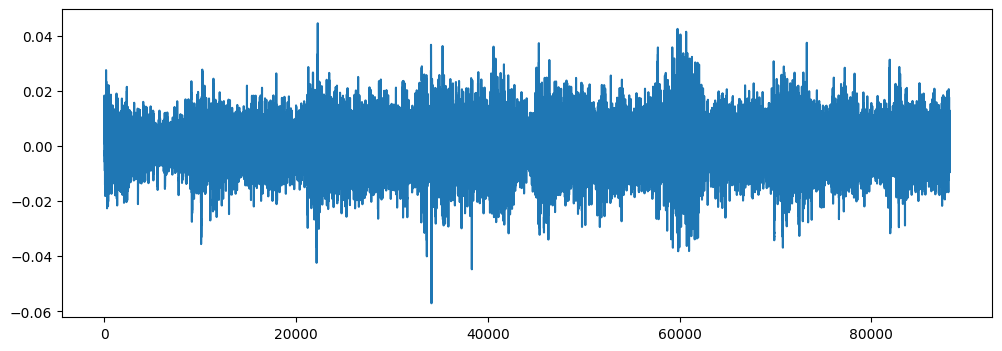

In [3]:
#Plot librosa data
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

Let's read the same audio file using scipy package

In [4]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [5]:
wave_audio # 2 channels using scipy with unnormalized data

array([[ 206,  163],
       [ 221,  164],
       [ 268,  232],
       ...,
       [-413,  173],
       [-459,  124],
       [-479,   19]], dtype=int16)

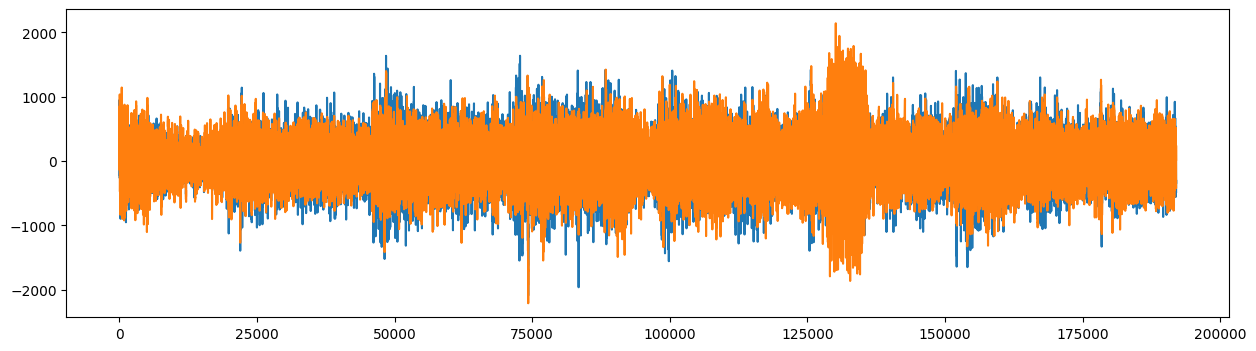

In [6]:
import matplotlib.pyplot as plt
#original audio with 2 channels in blue and orange
plt.figure(figsize=(15, 4))
plt.plot(wave_audio)

We will take these signals and attempt to create some independent features.

## Feature Extraction ##

We will utilize Mel-Frequency Cepstral Coefficients (MFCC) from the audio samples. MFCC captures the frequency distribution within the window size, enabling the analysis of both frequency and time characteristics of the sound. These audio representations will help us identify features for classification.

Link for reference: https://www.youtube.com/watch?v=4_SH2nfbQZ8&t=0s

In [7]:
mfcc = librosa.feature.mfcc(y = librosa_audio_data, sr = librosa_sample_rate, n_mfcc=40) #this 40 is being assigned to the number of MFCCs
print(mfcc.shape)

(40, 173)


In [8]:
mfcc #patterns extracted based on the frequency and time characteristics to uniquely identify the audio signals to corresponding class labels

array([[-3.1925809e+02, -2.9483157e+02, -3.0291397e+02, ...,
        -3.1739627e+02, -3.1440588e+02, -3.2856140e+02],
       [ 8.4317780e+01,  8.2091766e+01,  8.1065536e+01, ...,
         8.6607742e+01,  8.9827988e+01,  9.8324295e+01],
       [ 4.0132279e+00,  2.0044267e-01, -8.1244411e+00, ...,
        -1.3994555e+01, -1.5255758e+01, -8.0216970e+00],
       ...,
       [ 3.9292572e+00,  6.8303270e+00,  1.8434331e+00, ...,
        -1.4527726e-01, -1.8950844e+00, -1.6281416e+00],
       [ 5.5113354e+00,  4.0100150e+00, -1.2197342e+00, ...,
         4.7535372e+00,  6.6015987e+00,  4.5735531e+00],
       [-3.4027443e+00, -6.8166747e+00, -7.5914321e+00, ...,
        -1.7982340e+00,  3.3550448e+00,  2.8928797e+00]], dtype=float32)

In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
#Implementing what we did above throughout all files in the audio folder
import pandas as pd
import os
import librosa

audio_dataset_path = 'UrbanSound8K/audio/'
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [11]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


Define feature extraction function, which takes a file name and uses librosa to get the audio and sample rate. We will use MFCC to get the mfcc features. Then, we will take the mean of the transpose of the MFCCs to get the scaled features.


In [12]:
import numpy as np

In [13]:
def features_extract(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfcc_features = librosa.feature.mfcc(y=audio, sr = sample_rate, n_mfcc = 40)
    mfcc_scaled_features = np.mean(mfcc_features.T, axis = 0)

    return mfcc_scaled_features

In [14]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install resampy #librosa depends on resampy for resampling audio

Note: you may need to restart the kernel to use updated packages.


In [20]:
#iterate through the csv file to extract the audio file and extract corresponding features
from tqdm import tqdm
import resampy
extracted_features = []
for index, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"])) #we will take the dataset path and map it with folder, folder number, and get the slice_file_name
    final_class_labels = row['class']
    data=features_extract(file_name)
    extracted_features.append([data, final_class_labels]) #appending dependent and independent features into a list, we will make a dataset out of this"

3555it [02:09, 27.61it/s]/Users/palakprashant/Audio_Classification/Audio_Classification_Deep_Learning/.conda/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8323it [04:51, 41.11it/s]/Users/palakprashant/Audio_Classification/Audio_Classification_Deep_Learning/.conda/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/palakprashant/Audio_Classification/Audio_Classification_Deep_Learning/.conda/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [05:04, 28.71it/s]


In [21]:
#Converting the extracted features into a dataset
efdf = pd.DataFrame(extracted_features, columns = ['feature', 'class'])
efdf.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34076, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.3842, -46.520653, 52.00812, -...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [24]:
#split efdf into independent and dependent features
X = np.array(efdf['feature'].tolist())
y = np.array(efdf['class'].tolist())

In [25]:
X.shape

(8732, 40)

In [26]:
# label encoding dependent variable
y=np.array(pd.get_dummies(y))

In [32]:
y.shape #10 classes

(8732, 10)

In [33]:
#split dataset into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [34]:
X_train.shape

(6985, 40)

In [35]:
X_test.shape

(1747, 40)

In [36]:
y_train.shape

(6985, 10)

In [37]:
y_test.shape

(1747, 10)

In [ ]:
X_train #independent features

array([[-1.3110471e+02,  1.1250591e+02, -2.2574696e+01, ...,
         3.2466526e+00, -1.3690237e+00,  2.7557547e+00],
       [-1.3670342e+01,  9.1085083e+01, -7.7927332e+00, ...,
        -3.2530508e+00, -5.2774529e+00, -1.5569718e+00],
       [-4.9871544e+01,  2.6535299e-01, -2.0500937e+01, ...,
         2.8545945e+00, -1.6092044e+00,  3.5248058e+00],
       ...,
       [-4.2701236e+02,  9.2623047e+01,  3.1293974e+00, ...,
         7.4264091e-01,  7.3349088e-01,  7.1100920e-01],
       [-1.4575461e+02,  1.3626578e+02, -3.3515522e+01, ...,
         1.4681193e+00, -2.0091701e+00, -8.8218188e-01],
       [-4.2103134e+02,  2.1065454e+02,  3.4906609e+00, ...,
        -5.3888669e+00, -3.3713605e+00, -1.5665118e+00]], dtype=float32)

In [39]:
y

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])